# Import basic Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Set Seaborn style for better visuals

In [ ]:
sns.set(style="whitegrid")

# Step 1: Load the Dataset

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Step 2: Generate Summary Statistics

In [ ]:
# Summary Statistics for Numerical Features:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Value Counts for Categorical Features:

In [ ]:
# Sex Distribution:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
# Embarked Distribution:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# Pclass Distribution:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


# Step 3: Create Histograms for Numeric Features

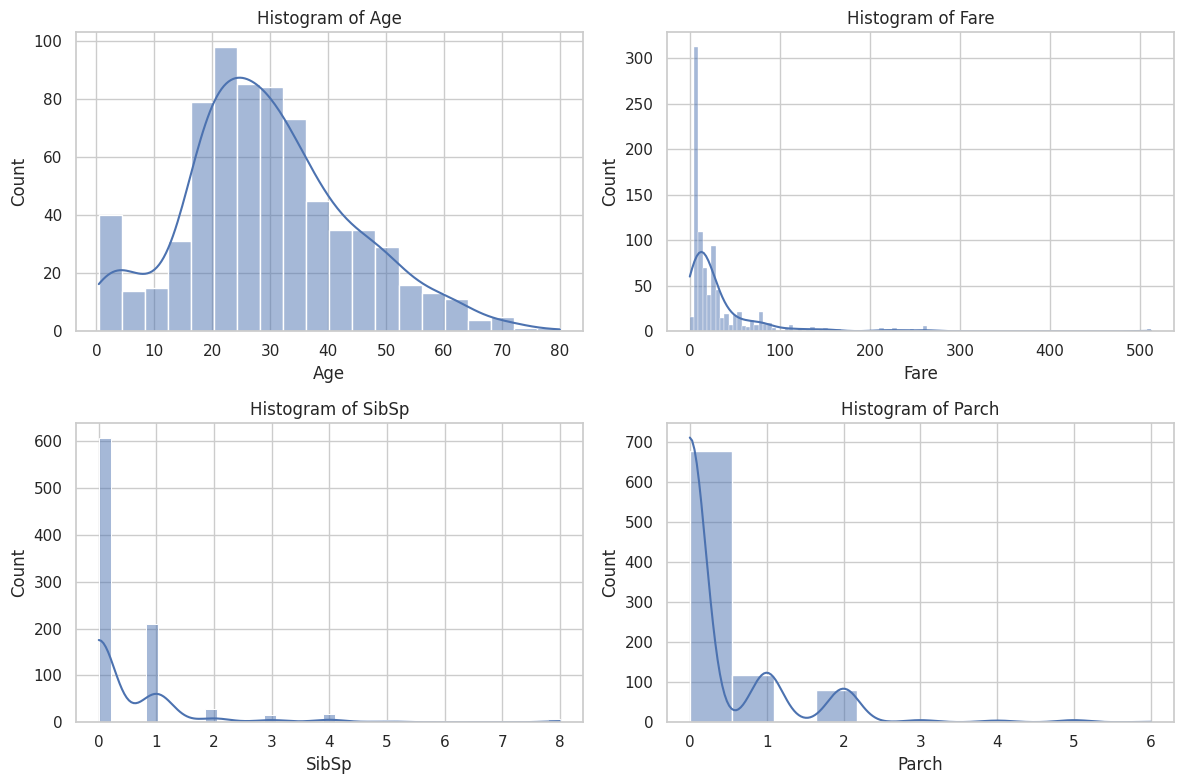

In [ ]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

### Create Boxplots for Numeric Features

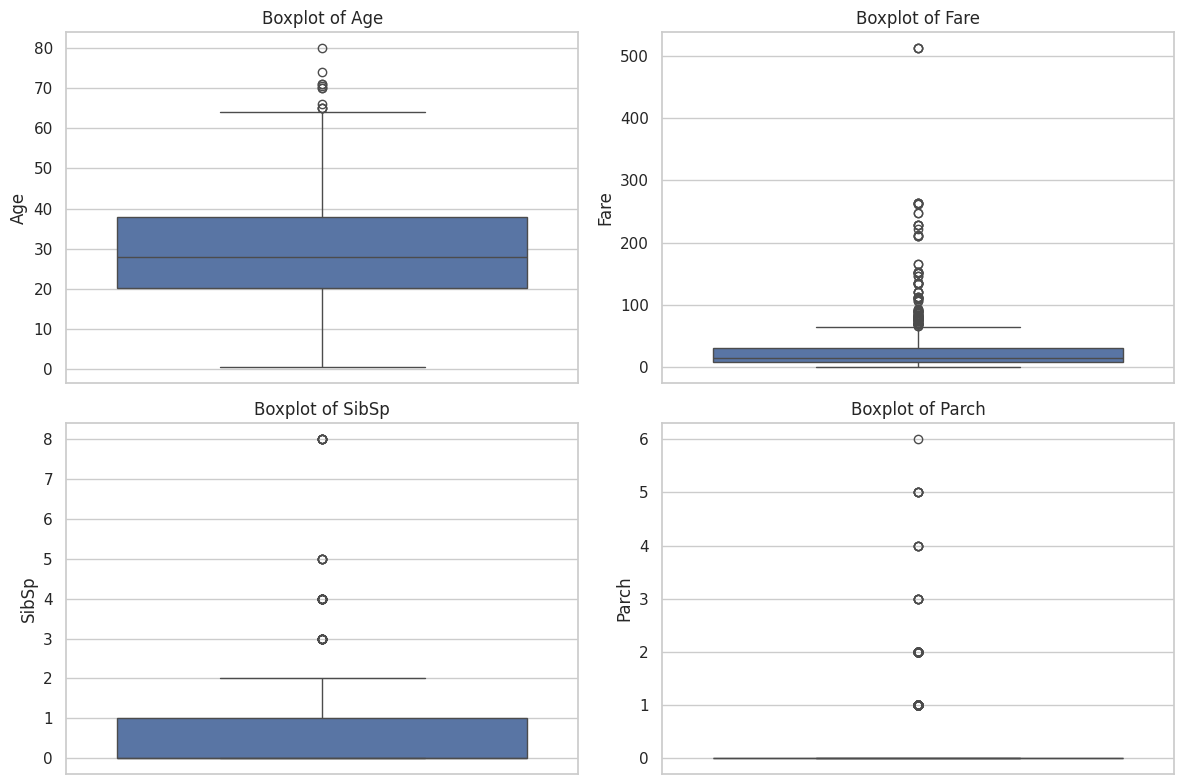

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 4: Pairplot for Feature Relationships

### Select numerical columns and Survived for pairplot

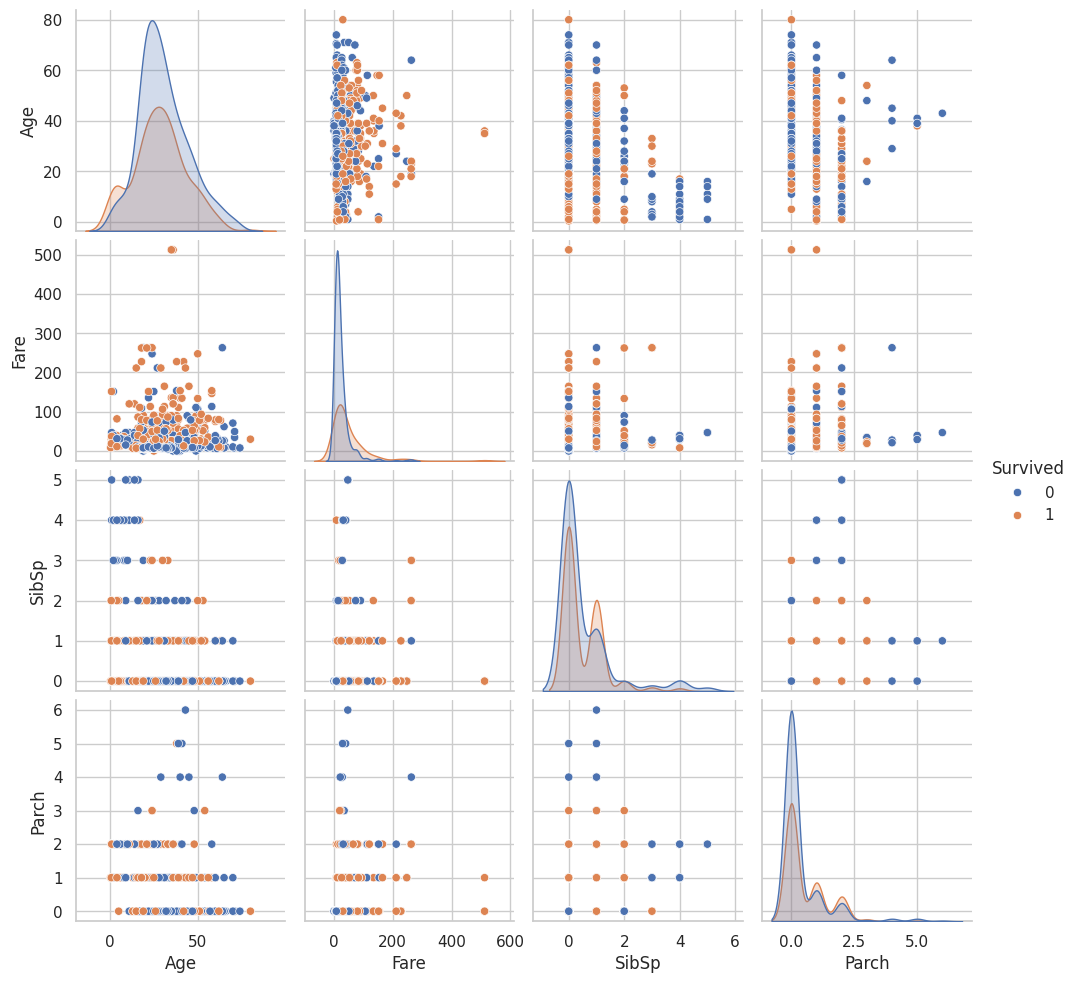

In [ ]:
sns.pairplot(df[numerical_cols + ['Survived']].dropna(), hue='Survived')
plt.show()

### Compute correlation matrix for numerical features

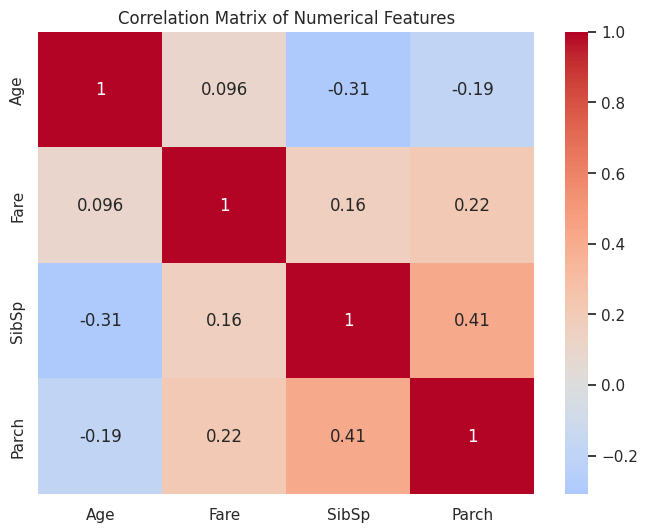

In [ ]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Step 5: Identify Patterns and Trends

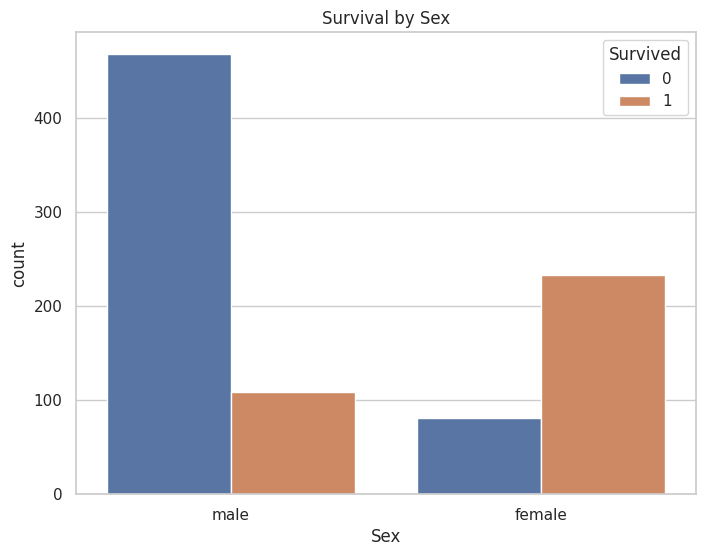

In [ ]:
# Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

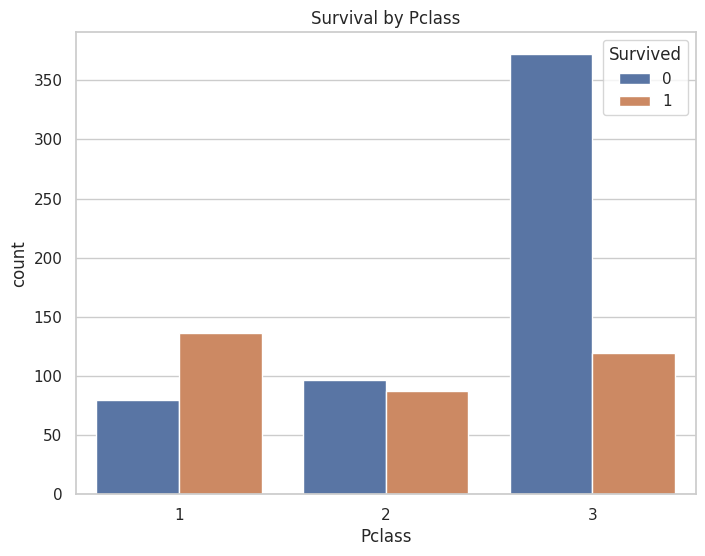

In [ ]:
# Survival by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()

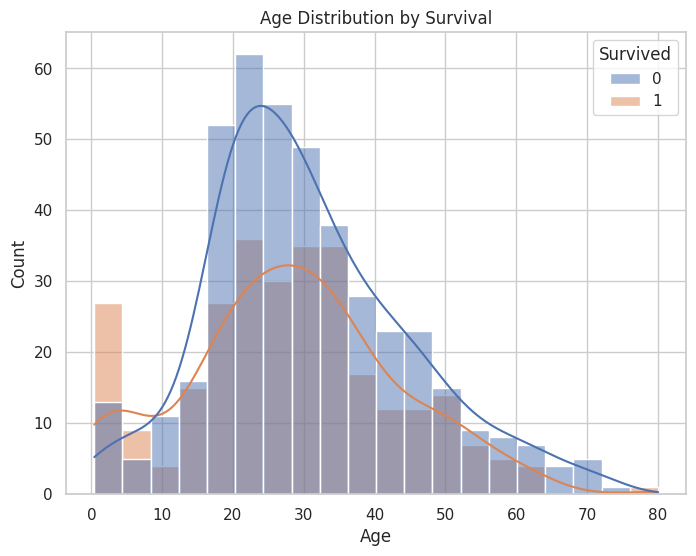

In [ ]:
# Age distribution by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

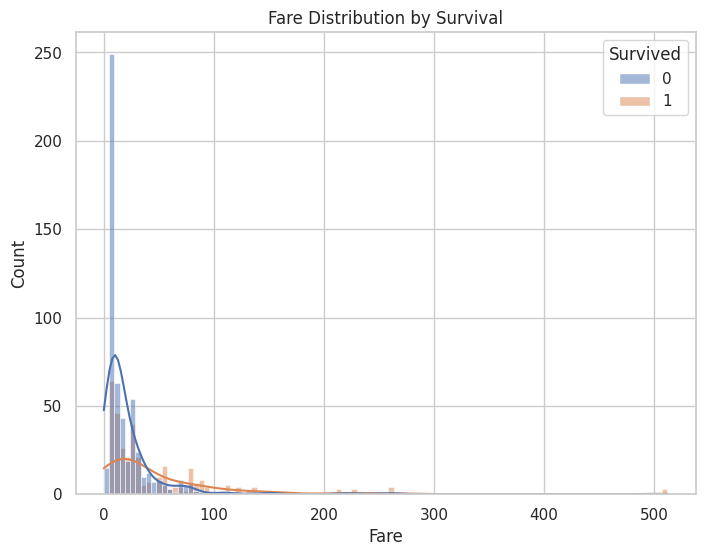

In [ ]:
# Fare distribution by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

# Step 6: Save the dataset

In [ ]:
df.to_csv('/content/Titanic-EDA.csv', index=False)
print("\nEDA dataset saved as 'Titanic-EDA.csv'")


EDA dataset saved as 'Titanic-EDA.csv'


# Step 7: Summarize Findings

- **Numerical Features**:
  - *Age* and *Fare* are right-skewed.  
  - *SibSp* and *Parch* have many zero values.

- **Outliers**:  
  - *Fare* has extreme values (e.g., >500), indicating high-cost tickets.

- **Correlations**:  
  - Weak correlations between numerical features.  
  - *SibSp* and *Parch* show a moderate positive correlation.

- **Patterns**:  
  - Females and passengers in higher classes (*Pclass = 1*) have higher survival rates.

- **Trends**:  
  - Younger passengers and those with higher fares tend to have better survival chances.

- **Anomalies**:  
  - Some passengers paid zero fare, which may indicate crew members or special cases.
